In [1]:
from qiskit import QuantumCircuit, Aer
from qiskit.quantum_info import Statevector

In [2]:
qc = QuantumCircuit(2)
# This calculates the state of the vector
ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

In [3]:
# apply de CX-gate to one of the qubits
qc.cx(0,1)
ket.draw(output='latex')

<IPython.core.display.Latex object>

In [4]:
# Try again
qc = QuantumCircuit(2)
qc.x(1)
qc.cx(1,0)
# This calculates the state of the vector
ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

## Let's try entangled a state

In [5]:
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(1,0)
#qc.cz(1,0) # gives a phase if |11>

ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

## Physical interpreatation of CX

In [6]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.z(0) # pahse from |+> to |->

ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

In [7]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.z(0) # pahse from |+> to |->
qc.cx(1,0) # pahse kickback

ket = Statevector(qc)
ket.draw(output='latex')

<IPython.core.display.Latex object>

# Qubits working together: Superdense coding
### The teleportation protocol

In [8]:
# Message
message = '00'

# Sen the message just using qubits to encode the value
# and applying X-gate to flip them for a 1 state
# but this not involve entanglement
qc_alice = QuantumCircuit(2,2)
if message[-1]=='1':
    qc_alice.x(0)
if message[-2]=='1':
    qc_alice.x(1)
    
# Now Bob just need to measure
backend = Aer.get_backend('aer_simulator')
qc_bob = QuantumCircuit(2,2)
qc_bob.measure([0,1],[0,1])
backend.run(qc_alice.compose(qc_bob)).result().get_counts()

{'00': 1024}

Now we can try with entanglement:

In [9]:
message = '00'
qc_alice = QuantumCircuit(2,2)
if message[-1]=='1':
    qc_alice.x(0)
if message[-2]=='1':
    qc_alice.x(1)
    
# create the entangkement
qc_alice.h(1)
qc_alice.cx(1,0)
ket = Statevector(qc_alice)
print(f'This is the entanglement for state {message}, there are others with the other three')
ket.draw(output='latex')

This is the entanglement for state 00, there are others with the other three


<IPython.core.display.Latex object>

Bob needs to undo the H and CX gate to get to know the message:

In [10]:
qc_bob = QuantumCircuit(2,2)
# Disentagles
qc_bob.cx(1,0)
qc.h(1)
# then measures
qc_bob.measure([0,1],[0,1])

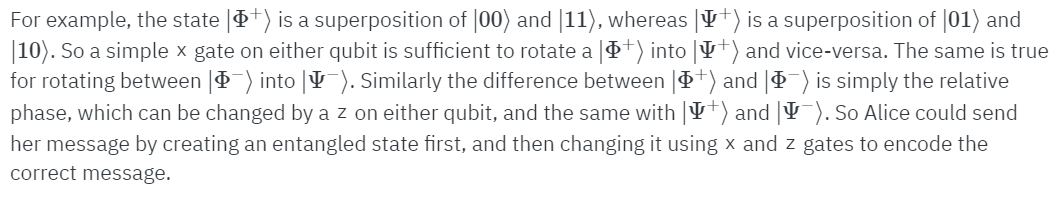

In [30]:
message = '00'

qc_alice = QuantumCircuit(2,2)
qc_alice.h(1)
qc_alice.cx(1,0)

# encoding the message into a Bell state
if message[-2]=='1':
    qc_alice.z(1)
if message[-1]=='1':
    qc_alice.x(1)

ket = Statevector(qc_alice)
print(f'This is the entangled state for {message}:')
ket.draw(output='latex')

This is the entangled state for 00:


<IPython.core.display.Latex object>

In [33]:
qc_bob = QuantumCircuit(2,2)
# Bob disentangles
qc_bob.cx(1,0)
qc_bob.h(1)
# Then measures
qc_bob.measure([0,1],[0,1])

backend = Aer.get_backend('aer_simulator')
backend.run(qc_alice.compose(qc_bob)).result().get_counts()

{'00': 1024}

Now imagine just a third party that create the entangled state and the Alice encodes the message and send it to Bob

In [34]:
qc_charlie = QuantumCircuit(2,2)
qc_charlie.h(1)
qc_charlie.cx(1,0)

In [35]:
message  = '00'
qc_alice = QuantumCircuit(2,2)

if message[-2]=='1':
    qc_alice.z(1)
if message[-1]=='1':
    qc_alice.x(1)

In [36]:
qc_bob = QuantumCircuit(2,2)
# Bob disentangles
qc_bob.cx(1,0)
qc_bob.h(1)
# Then measures
qc_bob.measure([0,1],[0,1])

In [37]:
complete_qc = qc_charlie.compose(qc_alice.compose(qc_bob))
backend.run(complete_qc).result().get_counts()

{'00': 1024}

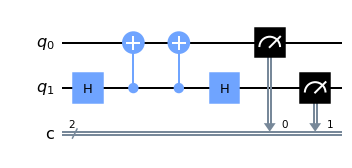

In [38]:
complete_qc.draw(output='mpl')

# Unique correlations: Hardy paradox

The X-measurement:

Results from x measurement: {'0': 529, '1': 495}


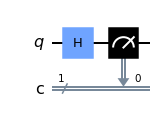

In [46]:
meas_x = QuantumCircuit(1,1)
meas_x.h(0)
meas_x.measure(0,0)

print('Results from x measurement:',
      backend.run(meas_x).result().get_counts())
meas_x.draw(output='mpl')

$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$
$\newcommand{\bra}[1]{\left\langle{#1}\right|}$
If we initiate with $\ket{1}$:

Results from x measurement: {'0': 516, '1': 508}


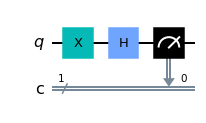

In [48]:
meas_x = QuantumCircuit(1,1)
meas_x.x(0)
meas_x.h(0)
meas_x.measure(0,0)

print('Results from x measurement:',
      backend.run(meas_x).result().get_counts())
meas_x.draw(output='mpl')

$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$
$\newcommand{\bra}[1]{\left\langle{#1}\right|}$
If we initiate with $\ket{+}$:

Results from x measurement: {'0': 1024}


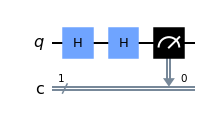

In [49]:
meas_x = QuantumCircuit(1,1)
meas_x.h(0)
meas_x.h(0)
meas_x.measure(0,0)

print('Results from x measurement:',
      backend.run(meas_x).result().get_counts())
meas_x.draw(output='mpl')

The Z-measurement:

Results from z measurement: {'0': 1024}


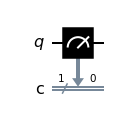

In [51]:
meas_z = QuantumCircuit(1,1)
meas_z.measure(0,0)

print('Results from z measurement:',
      backend.run(meas_z).result().get_counts())
meas_z.draw(output='mpl')

$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$
$\newcommand{\bra}[1]{\left\langle{#1}\right|}$
If we initiate with $\ket{1}$:

Results from z measurement: {'1': 1024}


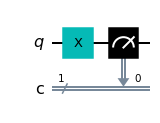

In [52]:
meas_z = QuantumCircuit(1,1)
meas_z.x(0)
meas_z.measure(0,0)

print('Results from z measurement:',
      backend.run(meas_z).result().get_counts())
meas_z.draw(output='mpl')

$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$
$\newcommand{\bra}[1]{\left\langle{#1}\right|}$
If we initiate with $\ket{+}$:

Results from z measurement: {'0': 516, '1': 508}


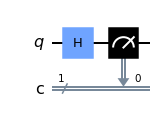

In [53]:
meas_z = QuantumCircuit(1,1)
meas_z.h(0)
meas_z.measure(0,0)

print('Results from z measurement:',
      backend.run(meas_z).result().get_counts())
meas_z.draw(output='mpl')

Now, the H-gate apply in Z-measurement circuit gives an uncertainty, while on X-measurement circuit gives certainty.

Now we can try different angles of rotaitons:

In [54]:
meas_z = QuantumCircuit(1,1)
meas_z.measure(0,0)

meas_x = QuantumCircuit(1,1)
meas_x.h(0)
meas_x.measure(0,0)

Apply $Ry=-\pi/4$:

In [55]:
from math import pi

qc = QuantumCircuit(1,1)
qc.ry(-pi/4,0)

In [56]:
for basis,circ in [('z', meas_z), ('x', meas_x)]:
    print('Results from ' + basis + ' measurement:',
      backend.run(qc.compose(circ)).result().get_counts())

Results from z measurement: {'0': 861, '1': 163}
Results from x measurement: {'1': 875, '0': 149}
